In [18]:
%matplotlib inline

In [19]:
from keras.models import Sequential
from keras.layers import Dense, LeakyReLU
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping 
import numpy as np
import matplotlib.pyplot as plt

# Create the model

In [20]:
def make_model(): # create multiple identical models for comparison purposes
    model = Sequential()
    model.add(Dense(20,))
    for hidden_layers in range(4):
        model.add(Dense(80,))
        model.add(LeakyReLU(0.01))
    model.add(Dense(20,))

    opt = Adam(lr=1e-5)
    model.compile(optimizer=opt, loss='mean_squared_error', metrics=['mae', 'mse'])
    return model


ham = make_model()
ddm = make_model()


# Read the training data
X  = np.load('train/X.npy')
Y  = np.load('train/Y.npy')
Z  = np.load('train/Z.npy')
Xv = np.load('validation/X.npy')
Yv = np.load('validation/Y.npy')
Zv = np.load('validation/Z.npy')

In [ ]:
# don't predict boundary conditions
Y  =  Y[:,1:-1]
Yv = Yv[:,1:-1]

# fixup the ddm method so it predicts T_{n+1} from T_{n}, but don't map from the end of one
# time  series to the start of the next one (with different alpha value)
Xddm = X
Yddm = X
Yddm = Yddm[:,1:-1] # drop boundary conditions
Xddm = np.delete(Xddm, np.arange(5000, 5001*16, 5001), axis=0) # drop the endpoint of time series
Yddm = np.delete(Yddm, np.arange(   0, 5001*16, 5001), axis=0) # drop the startpoint of time series

# repeat for validation data to be used in ddm
Xddm_v = Xv
Yddm_v = Xv
Yddm_v = Yddm_v[:,1:-1] # drop boundary conditions
Xddm_v = np.delete(Xddm_v, np.arange(5000, 5001*16, 5001), axis=0) # drop the endpoint of time series
Yddm_v = np.delete(Yddm_v, np.arange(   0, 5001*16, 5001), axis=0) # drop the startpoint of time series


In [21]:
print(X.shape)
print(Xv.shape)
print(Y.shape)
print(Xddm.shape)
print(Yddm.shape)

(80000, 20)
(10000, 20)
(80000, 20)


NameError: name 'Xddm' is not defined

# Train the model

In [22]:
early_stopping_monitor = EarlyStopping(patience=20) 
history_ham = ham.fit(X,Y, 
                      batch_size=32,
                      epochs=100,
                      validation_data=(Xv,Yv),
                      callbacks=[early_stopping_monitor])

Train on 80000 samples, validate on 10000 samples
Epoch 1/100
80000/80000 [==============================] - 4s 52us/step - loss: 0.0242 - mean_absolute_error: 0.0671 - mean_squared_error: 0.0242 - val_loss: 1.0174e-04 - val_mean_absolute_error: 0.0082 - val_mean_squared_error: 1.0174e-04
Epoch 2/100
80000/80000 [==============================] - 4s 55us/step - loss: 3.1038e-04 - mean_absolute_error: 0.0134 - mean_squared_error: 3.1038e-04 - val_loss: 3.2836e-05 - val_mean_absolute_error: 0.0043 - val_mean_squared_error: 3.2836e-05
Epoch 3/100
80000/80000 [==============================] - 4s 47us/step - loss: 4.7881e-05 - mean_absolute_error: 0.0047 - mean_squared_error: 4.7881e-05 - val_loss: 9.4053e-06 - val_mean_absolute_error: 0.0024 - val_mean_squared_error: 9.4053e-06
Epoch 4/100
80000/80000 [==============================] - 4s 46us/step - loss: 8.7773e-06 - mean_absolute_error: 0.0018 - mean_squared_error: 8.7773e-06 - val_loss: 2.6261e-06 - val_mean_absolute_error: 0.0013 - v

Epoch 33/100
80000/80000 [==============================] - 4s 45us/step - loss: 2.6574e-08 - mean_absolute_error: 6.4314e-05 - mean_squared_error: 2.6574e-08 - val_loss: 3.6430e-09 - val_mean_absolute_error: 2.0017e-05 - val_mean_squared_error: 3.6430e-09
Epoch 34/100
80000/80000 [==============================] - 4s 50us/step - loss: 1.4564e-08 - mean_absolute_error: 5.6154e-05 - mean_squared_error: 1.4564e-08 - val_loss: 3.6449e-09 - val_mean_absolute_error: 2.3878e-05 - val_mean_squared_error: 3.6449e-09
Epoch 35/100
80000/80000 [==============================] - 4s 46us/step - loss: 1.9620e-08 - mean_absolute_error: 6.0714e-05 - mean_squared_error: 1.9620e-08 - val_loss: 8.0859e-09 - val_mean_absolute_error: 5.6886e-05 - val_mean_squared_error: 8.0859e-09
Epoch 36/100
80000/80000 [==============================] - 4s 45us/step - loss: 1.7437e-08 - mean_absolute_error: 6.0580e-05 - mean_squared_error: 1.7437e-08 - val_loss: 3.5120e-09 - val_mean_absolute_error: 2.7964e-05 - val_mea

Epoch 65/100
80000/80000 [==============================] - 4s 45us/step - loss: 2.1635e-08 - mean_absolute_error: 4.3941e-05 - mean_squared_error: 2.1635e-08 - val_loss: 1.3392e-07 - val_mean_absolute_error: 3.1249e-04 - val_mean_squared_error: 1.3392e-07
Epoch 66/100
80000/80000 [==============================] - 4s 47us/step - loss: 1.7477e-08 - mean_absolute_error: 4.7539e-05 - mean_squared_error: 1.7477e-08 - val_loss: 1.0116e-09 - val_mean_absolute_error: 1.0205e-05 - val_mean_squared_error: 1.0116e-09
Epoch 67/100
80000/80000 [==============================] - 4s 49us/step - loss: 1.1510e-08 - mean_absolute_error: 4.1290e-05 - mean_squared_error: 1.1510e-08 - val_loss: 1.4784e-08 - val_mean_absolute_error: 9.8395e-05 - val_mean_squared_error: 1.4784e-08
Epoch 68/100
80000/80000 [==============================] - 4s 46us/step - loss: 2.2124e-08 - mean_absolute_error: 4.5065e-05 - mean_squared_error: 2.2124e-08 - val_loss: 1.1668e-09 - val_mean_absolute_error: 1.6535e-05 - val_mea

Epoch 97/100
80000/80000 [==============================] - 4s 48us/step - loss: 1.5555e-08 - mean_absolute_error: 4.2614e-05 - mean_squared_error: 1.5555e-08 - val_loss: 1.2161e-09 - val_mean_absolute_error: 2.2819e-05 - val_mean_squared_error: 1.2161e-09
Epoch 98/100
80000/80000 [==============================] - 4s 46us/step - loss: 1.7942e-08 - mean_absolute_error: 4.4540e-05 - mean_squared_error: 1.7942e-08 - val_loss: 4.7528e-10 - val_mean_absolute_error: 6.3858e-06 - val_mean_squared_error: 4.7528e-10
Epoch 99/100
80000/80000 [==============================] - 4s 46us/step - loss: 1.3249e-08 - mean_absolute_error: 4.0698e-05 - mean_squared_error: 1.3249e-08 - val_loss: 8.4695e-10 - val_mean_absolute_error: 1.9233e-05 - val_mean_squared_error: 8.4695e-10
Epoch 100/100
80000/80000 [==============================] - 4s 51us/step - loss: 1.5969e-08 - mean_absolute_error: 4.1625e-05 - mean_squared_error: 1.5969e-08 - val_loss: 4.4532e-10 - val_mean_absolute_error: 5.5117e-06 - val_me

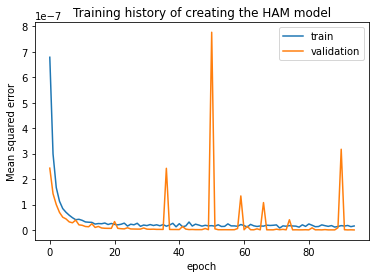

In [23]:
plt.plot(history_ham.history['mean_squared_error'][5:])
plt.plot(history_ham.history['val_mean_squared_error'][5:])
plt.legend(['train', 'validation'])
plt.xlabel('epoch')
plt.ylabel('Mean squared error')
plt.title('Training history of creating the HAM model')
plt.show()

In [24]:
early_stopping_monitor = EarlyStopping(patience=20) 
history_ddm = ddm.fit(X, Z,
                      batch_size=32,
                      epochs=100,
                      validation_data=(Xv,Zv),
                      callbacks=[early_stopping_monitor])

Train on 80000 samples, validate on 10000 samples
Epoch 1/100
80000/80000 [==============================] - 4s 51us/step - loss: 2.2286 - mean_absolute_error: 0.8695 - mean_squared_error: 2.2286 - val_loss: 0.0062 - val_mean_absolute_error: 0.0598 - val_mean_squared_error: 0.0062
Epoch 2/100
80000/80000 [==============================] - 4s 46us/step - loss: 0.0120 - mean_absolute_error: 0.0819 - mean_squared_error: 0.0120 - val_loss: 0.0035 - val_mean_absolute_error: 0.0445 - val_mean_squared_error: 0.0035
Epoch 3/100
80000/80000 [==============================] - 4s 45us/step - loss: 0.0063 - mean_absolute_error: 0.0567 - mean_squared_error: 0.0063 - val_loss: 6.7009e-04 - val_mean_absolute_error: 0.0180 - val_mean_squared_error: 6.7009e-04
Epoch 4/100
80000/80000 [==============================] - 4s 45us/step - loss: 0.0016 - mean_absolute_error: 0.0261 - mean_squared_error: 0.0016 - val_loss: 1.2463e-04 - val_mean_absolute_error: 0.0071 - val_mean_squared_error: 1.2463e-04
Epoch 

80000/80000 [==============================] - 4s 44us/step - loss: 8.7627e-08 - mean_absolute_error: 1.0464e-04 - mean_squared_error: 8.7627e-08 - val_loss: 1.3506e-08 - val_mean_absolute_error: 2.5791e-05 - val_mean_squared_error: 1.3506e-08
Epoch 34/100
80000/80000 [==============================] - 4s 45us/step - loss: 9.2638e-08 - mean_absolute_error: 1.1156e-04 - mean_squared_error: 9.2638e-08 - val_loss: 6.3802e-08 - val_mean_absolute_error: 1.8371e-04 - val_mean_squared_error: 6.3802e-08
Epoch 35/100
80000/80000 [==============================] - 4s 44us/step - loss: 1.1322e-07 - mean_absolute_error: 1.2239e-04 - mean_squared_error: 1.1322e-07 - val_loss: 1.2173e-08 - val_mean_absolute_error: 2.0169e-05 - val_mean_squared_error: 1.2173e-08
Epoch 36/100
80000/80000 [==============================] - 4s 45us/step - loss: 8.5712e-08 - mean_absolute_error: 1.1975e-04 - mean_squared_error: 8.5712e-08 - val_loss: 4.8545e-08 - val_mean_absolute_error: 1.5515e-04 - val_mean_squared_err

Epoch 65/100
80000/80000 [==============================] - 4s 50us/step - loss: 8.0189e-08 - mean_absolute_error: 1.0662e-04 - mean_squared_error: 8.0189e-08 - val_loss: 5.1884e-09 - val_mean_absolute_error: 1.3018e-05 - val_mean_squared_error: 5.1884e-09
Epoch 66/100
80000/80000 [==============================] - 4s 46us/step - loss: 7.9628e-08 - mean_absolute_error: 1.0357e-04 - mean_squared_error: 7.9628e-08 - val_loss: 5.0922e-09 - val_mean_absolute_error: 1.3699e-05 - val_mean_squared_error: 5.0922e-09
Epoch 67/100
80000/80000 [==============================] - 4s 45us/step - loss: 1.1560e-07 - mean_absolute_error: 1.1662e-04 - mean_squared_error: 1.1560e-07 - val_loss: 4.9921e-09 - val_mean_absolute_error: 1.4370e-05 - val_mean_squared_error: 4.9921e-09
Epoch 68/100
80000/80000 [==============================] - 4s 44us/step - loss: 6.4910e-08 - mean_absolute_error: 1.0460e-04 - mean_squared_error: 6.4910e-08 - val_loss: 4.8582e-09 - val_mean_absolute_error: 1.0194e-05 - val_mea

Epoch 97/100
80000/80000 [==============================] - 4s 45us/step - loss: 1.2342e-07 - mean_absolute_error: 8.6093e-05 - mean_squared_error: 1.2342e-07 - val_loss: 5.1481e-09 - val_mean_absolute_error: 4.1363e-05 - val_mean_squared_error: 5.1481e-09
Epoch 98/100
80000/80000 [==============================] - 4s 50us/step - loss: 8.1851e-08 - mean_absolute_error: 9.7294e-05 - mean_squared_error: 8.1851e-08 - val_loss: 5.9719e-08 - val_mean_absolute_error: 1.8659e-04 - val_mean_squared_error: 5.9719e-08
Epoch 99/100
80000/80000 [==============================] - 4s 44us/step - loss: 8.8551e-08 - mean_absolute_error: 1.1201e-04 - mean_squared_error: 8.8551e-08 - val_loss: 3.6009e-09 - val_mean_absolute_error: 2.6744e-05 - val_mean_squared_error: 3.6009e-09
Epoch 100/100
80000/80000 [==============================] - 4s 45us/step - loss: 7.5600e-08 - mean_absolute_error: 1.0006e-04 - mean_squared_error: 7.5600e-08 - val_loss: 2.7527e-09 - val_mean_absolute_error: 1.0907e-05 - val_me

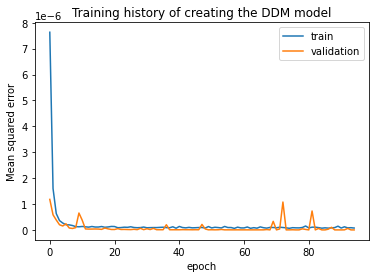

In [25]:
plt.plot(history_ddm.history['mean_squared_error'][5:])
plt.plot(history_ddm.history['val_mean_squared_error'][5:])
plt.legend(['train', 'validation'])
plt.xlabel('epoch')
plt.ylabel('Mean squared error')
plt.title('Training history of creating the DDM model')
plt.show()

In [26]:
print(ham.summary())
ham.save('ham.h5')
ddm.save('ddm.h5')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 20)                420       
_________________________________________________________________
dense_18 (Dense)             (None, 80)                1680      
_________________________________________________________________
leaky_re_lu_9 (LeakyReLU)    (None, 80)                0         
_________________________________________________________________
dense_19 (Dense)             (None, 80)                6480      
_________________________________________________________________
leaky_re_lu_10 (LeakyReLU)   (None, 80)                0         
_________________________________________________________________
dense_20 (Dense)             (None, 80)                6480      
_________________________________________________________________
leaky_re_lu_11 (LeakyReLU)   (None, 80)                0         
__________

# Verify against test cases

In [14]:
import IFEM_CoSTA
import splipy as sp
from keras.models import load_model
from os import listdir
from tqdm import tqdm

In [ ]:
ham = load_model('ham.h5')
ddm = load_model('ddm.h5')

In [27]:
spline = sp.Curve()
# spline.raise_order(1)
# spline.refine(17) # for a grand total of 20 controlpoints with p=2
spline.refine(18) # for a grand total of 20 controlpoints with p=1
spline = spline.set_dimension(1)

100%|██████████| 5000/5000 [00:20<00:00, 238.14it/s]


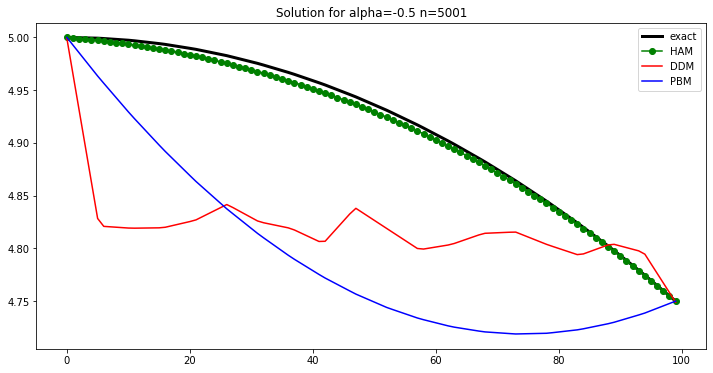

100%|██████████| 5000/5000 [00:20<00:00, 242.36it/s]


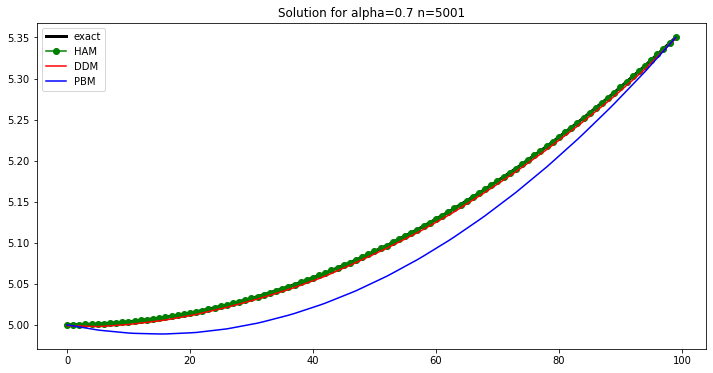

100%|██████████| 5000/5000 [00:21<00:00, 235.77it/s]


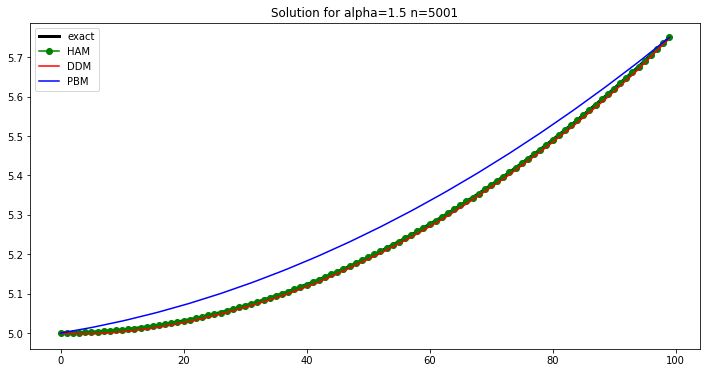

100%|██████████| 5000/5000 [00:22<00:00, 225.96it/s]


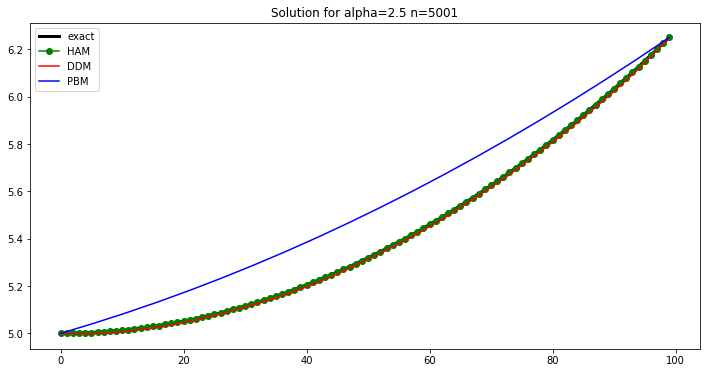

In [29]:
alphas = [-.5, .7, 1.5, 2.5  ]
for alpha in alphas:
# for myfile in listdir('test'):
    # if myfile[0] != 'X': continue
    # alpha = int(myfile[3:-4])/10
    
    # X  = np.load(f'test/{myfile}')

    pbm   = IFEM_CoSTA.HeatEquation('pbm.xinp')
    exact = IFEM_CoSTA.HeatEquation('P1.xinp')
    mu    = {'dt':0.001, 't':0.0, 'ALPHA':alpha}
    u_pbm_prev = pbm.initial_condition(mu)
    u_ddm_prev = pbm.initial_condition(mu)
    u_ham_prev = pbm.initial_condition(mu)
    u_exact_prev = exact.initial_condition(mu)
    sigma = [0.0]*pbm.ndof
    zeros = [0.0]*pbm.ndof
    
    # reshape data to fit into tensorflow
    u_ddm_prev = np.array(u_ddm_prev, ndmin=2)
                                                                               
    # run time iterations
    for n in tqdm(range(5000)):
        # update values
        mu['t'] += mu['dt']
        
        # fetch the boundary conditions
        ud = pbm.initial_condition(mu)
        
        # create a predictor step for ham
        u_ham_pred = pbm.predict(mu, u_ham_prev)

        # create a correction term for ham
        sigma = ham.predict(np.array(u_ham_pred, ndmin=2)).flatten()
                                          
        # update the next step with a corrector
        u_exact_prev     = exact.anasol(mu)['primary']
        u_pbm_prev       = pbm.correct(mu, u_pbm_prev, zeros)
        u_ham_prev       = pbm.correct(mu, u_ham_prev, sigma)
        u_ddm_prev       = ddm.predict(u_ddm_prev)
        u_ddm_prev[0,0]  = ud[0]
        u_ddm_prev[0,-1] = ud[-1]

        
    plt.figure(figsize=(12,6))
    
    x = np.linspace(0,1,100)
    N = spline.bases[0](x)
    plt.plot((N@u_exact_prev).T, 'k-', linewidth=3)
    plt.plot((N@u_ham_prev).T, 'go-')
    plt.plot((N@u_ddm_prev.flatten()).T, 'r-')
    plt.plot((N@u_pbm_prev).T, 'b-')
    plt.legend(['exact', 'HAM', 'DDM', 'PBM'])
    # plt.legend(['PBM', 'HAM', 'exact'])
    plt.title(f'Solution for alpha={alpha} n=5001')
    plt.show()
